## 2.기출문제 (빅분기 실기 2회)

In [1]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: 대상 경로가('bigdata') 이미 있고 빈 디렉터리가 아닙니다.


In [2]:
!git clone https://github.com/Soyoung-Yoon/data_02

fatal: 대상 경로가('data_02') 이미 있고 빈 디렉터리가 아닙니다.


#### 2-1. 보스턴 데이터
보스턴 데이터 범죄율 컬럼('CRIM')의 top10 중 10번째 범죄율 값으로 1~10위의 범죄율 값을 변경 후, 'AGE' 변수의 값이 80이상인 것에 대한 범죄율 평균을 산출하라.

In [3]:
## sklearn에서 더이상 boston 데이터를 제공하지 않으므로 교체합니다.
##from sklearn.datasets import load_boston
import pandas as pd
df = pd.read_csv('./data_02/boston.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [4]:
crim_10th = df['CRIM'].sort_values(ascending=False).head(10).to_list()[-1]
df.loc[df['CRIM'] >= crim_10th, 'CRIM'] = crim_10th

In [5]:
print(f"{df.loc[df['AGE'] >= 80, 'CRIM'].mean():.6f}")

5.759387


In [6]:
# 정답 : 5.759387

#### 2-2. 하우징 데이터
- housing.csv 파일을 사용한다
- 주어진 데이터의 첫번째 행 부터 순서대로 80% 까지의 데이터를 추출 후 'total_bedrooms' 변수의 결측값(NA)을 'total_bedrooms' 변수의 중앙값으로 대체하고,
- 대체 전의 'total_bedrooms' 변수 표준편차값과 대체 후의 'total_bedrooms' 변수 표준편차 값을 산출하여
- 대체 전 표준편차 값 - 대체 후 표준편차 값을 구해 출력한다.

In [7]:
# https://www.kaggle.com/camnugent/introduction-to-machine-learning-in-r-tutorial

In [8]:
import pandas as pd

housing = pd.read_csv('./bigdata/housing.csv')
df = housing.iloc[:int(len(housing) * 0.8), :]

total_bedrooms_median = df['total_bedrooms'].median()
total_bedrooms_std1 = df['total_bedrooms'].std()
total_bedrooms_std2 = df['total_bedrooms'].mask(df['total_bedrooms'].isna(), total_bedrooms_median).std()

print(total_bedrooms_std1 - total_bedrooms_std2)

1.9751472916456692


In [9]:
# 정답 : 1.9751472916456692

#### 2-3. 하우징 데이터 
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing.csv' 파일을 사용한다
- 하우징 데이터에서 'latitude' 컬럼의 이상치를 찾아 이상치들의 합을 산출하시오.
- 이상치 기준 : 평균 - (표준편차 * 1.5), 평균 + (표준편차 * 1.5) 

In [10]:
import pandas as pd

housing = pd.read_csv('./bigdata/housing.csv')
latitude_mean, latitude_std = housing['latitude'].agg(['mean', 'std'])
latitude_min, latitude_max = latitude_mean - (latitude_std * 1.5), latitude_mean + (latitude_std * 1.5)

housing.loc[(housing['latitude'] < latitude_min) | (housing['latitude'] > latitude_max), 'latitude'].sum()

45815.75

In [11]:
# 평균 - (표준편차 * 1.5), 평균 + (표준편차 * 1.5)

In [12]:
# 정답: 45815.75

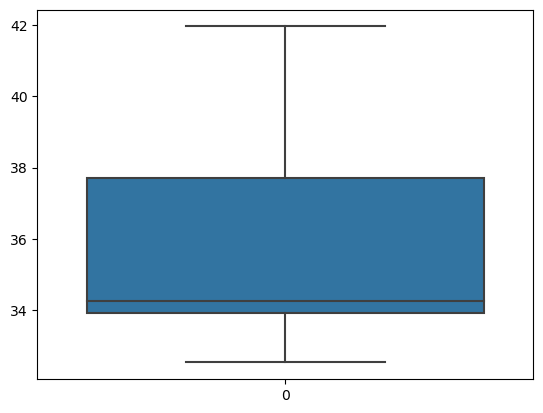

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.boxplot(housing['latitude'])
plt.show()

## 3.기출문제 (빅분기 실기 2회)
- 고객 구매 데이터를 사용해서 고객이 주문한 물품이 제 시간에 도착여부(Reached.on.Time_Y.N) 예측
- X_train.csv, y_train.csv : 학습 및 학습평가에 사용하는 파일
- X_test.csv : 제출용 데이터 생성에 사용하는 파일
- roc_score를 사용하여 평가
- 아래의 형식으로 submission수험번호.csv 로 저장
- Reached.on.Time_Y.N은 제 시간에 도착할 확률
```
ID,Reached.on.Time_Y.N
7007,0.27419354838709675
9793,0.4883720930232558
6593,0.48174157303370785
10527,0.3657243816254417
```

### 3-01.문제이해

In [14]:
# https://www.kaggle.com/prachi13/customer-analytics?select=Train.csv
# 기출에서 기억나는 것
# - 컬럼 중 1개가 숫자형으로 안내 되었는데 info() 결과 object로 표시됨
# - head() 로 해서 표시되지 않았음 
# - value가 '1', '*7', '4', '9', '*7' 이렇게 되어 있어서 '*'을 제거하고 dtype을 변경해야함

In [15]:
import pandas as pd
# 이상한 것 확인
df = pd.DataFrame({'rating': ['1', '2', '4', '*7', '8', '*7', '3', '5', '2', '*4']})
df.head(2)

,rating
0,1
1,2


In [16]:
df['rating'].replace(r'\*', '', regex=True)

0    1
1    2
2    4
3    7
4    8
5    7
6    3
7    5
8    2
9    4
Name: rating, dtype: object

### 3-02.데이터 불러오기, 탐색

***pandas의 출력 설정 옵션 다시 확인하세요!***

In [17]:
# [0] x_train, x_test 데이터로 생성함
# 이 부분은 시험에서는 없습니다. 그냥 데이터를 3개로 나누기 위해 사용한 것입니다.
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')
x_train, x_test = train_test_split(dftot, test_size=0.4, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['ID', 'Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['ID', 'Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

In [18]:
x_train.shape, y_train.shape, x_test.shape

((6599, 11), (6599, 2), (4400, 11))

In [19]:
# 여기에 문제를 풀이해 보세요!

### 데이터 로드

In [20]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder

In [21]:
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.4f}'.format

In [22]:
X = pd.read_csv('./x_train.csv')
Y = pd.read_csv('./y_train.csv')
X_submission = pd.read_csv('./x_test.csv')
print([x.shape for x in [X, Y, X_submission]])

[(6599, 11), (6599, 2), (4400, 11)]


### 데이터 확인 및 탐색

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6599 non-null   int64 
 1   Warehouse_block      6599 non-null   object
 2   Mode_of_Shipment     6599 non-null   object
 3   Customer_care_calls  6599 non-null   int64 
 4   Customer_rating      6599 non-null   int64 
 5   Cost_of_the_Product  6599 non-null   int64 
 6   Prior_purchases      6599 non-null   int64 
 7   Product_importance   6599 non-null   object
 8   Gender               6599 non-null   object
 9   Discount_offered     6599 non-null   int64 
 10  Weight_in_gms        6599 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 567.2+ KB


In [24]:
X.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9902,F,Ship,3,5,214,2,medium,F,6,4578
1,9501,A,Ship,4,2,201,3,medium,F,4,4613


In [25]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   6599 non-null   int64
 1   Reached.on.Time_Y.N  6599 non-null   int64
dtypes: int64(2)
memory usage: 103.2 KB


In [26]:
Y.head(2)

,ID,Reached.on.Time_Y.N
0,9902,0
1,9501,0


In [27]:
X_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   4400 non-null   int64 
 1   Warehouse_block      4400 non-null   object
 2   Mode_of_Shipment     4400 non-null   object
 3   Customer_care_calls  4400 non-null   int64 
 4   Customer_rating      4400 non-null   int64 
 5   Cost_of_the_Product  4400 non-null   int64 
 6   Prior_purchases      4400 non-null   int64 
 7   Product_importance   4400 non-null   object
 8   Gender               4400 non-null   object
 9   Discount_offered     4400 non-null   int64 
 10  Weight_in_gms        4400 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 378.2+ KB


In [28]:
X_submission.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,7007,C,Ship,4,1,238,3,high,F,4,4910
1,9793,D,Ship,4,2,245,3,medium,M,1,4731


### 데이터 전처리

In [29]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [30]:
object_features = dfX.select_dtypes(include='object').columns.to_list()
target_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']

for feature in object_features:
    print(f'{feature:20s} : {dfX[feature].unique()}')

Warehouse_block      : ['F' 'A' 'B' 'D' 'C']
Mode_of_Shipment     : ['Ship' 'Road' 'Flight']
Product_importance   : ['medium' 'low' 'high']
Gender               : ['F' 'M']


In [31]:
tempdf = dfX.drop(columns=object_features)
tempdf['Gender'] = LabelEncoder().fit_transform(dfX['Gender'])

temp_list = [tempdf]

for feature in target_features:
    temp = pd.get_dummies(dfX[feature], prefix=feature)
    temp_list.append(temp)

dfX2 = pd.concat(temp_list, axis=1)

In [32]:
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Gender                     10999 non-null  int64
 8   Warehouse_block_A          10999 non-null  uint8
 9   Warehouse_block_B          10999 non-null  uint8
 10  Warehouse_block_C          10999 non-null  uint8
 11  Warehouse_block_D          10999 non-null  uint8
 12  Warehouse_block_F          10999 non-null  uint8
 13  Mode_of_Shipment_Flight    10999 non-null  uint8
 14  Mode_of_Shipment_Road 

### 상관관계 분석

In [33]:
dfXY = pd.merge(dfX2, Y, on='ID')
dfXY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6599 entries, 0 to 6598
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         6599 non-null   int64
 1   Customer_care_calls        6599 non-null   int64
 2   Customer_rating            6599 non-null   int64
 3   Cost_of_the_Product        6599 non-null   int64
 4   Prior_purchases            6599 non-null   int64
 5   Discount_offered           6599 non-null   int64
 6   Weight_in_gms              6599 non-null   int64
 7   Gender                     6599 non-null   int64
 8   Warehouse_block_A          6599 non-null   uint8
 9   Warehouse_block_B          6599 non-null   uint8
 10  Warehouse_block_C          6599 non-null   uint8
 11  Warehouse_block_D          6599 non-null   uint8
 12  Warehouse_block_F          6599 non-null   uint8
 13  Mode_of_Shipment_Flight    6599 non-null   uint8
 14  Mode_of_Shipment_Road   

In [34]:
dfXY.corr(numeric_only=True)['Reached.on.Time_Y.N']

ID                          -0.4034
Customer_care_calls         -0.0712
Customer_rating              0.0227
Cost_of_the_Product         -0.0726
Prior_purchases             -0.0617
Discount_offered             0.3941
Weight_in_gms               -0.2745
Gender                       0.0074
Warehouse_block_A            0.0126
Warehouse_block_B           -0.0076
Warehouse_block_C           -0.0041
Warehouse_block_D           -0.0035
Warehouse_block_F            0.0020
Mode_of_Shipment_Flight      0.0041
Mode_of_Shipment_Road       -0.0096
Mode_of_Shipment_Ship        0.0042
Product_importance_high      0.0229
Product_importance_low      -0.0060
Product_importance_medium   -0.0069
Reached.on.Time_Y.N          1.0000
Name: Reached.on.Time_Y.N, dtype: float64

### 모델링

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_model_score(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain)
    pred2 = model.predict(xtest)
    
    A1 = accuracy_score(ytrain, pred1)
    A2 = accuracy_score(ytest, pred2)
    B = precision_score(ytest, pred2)
    C = recall_score(ytest, pred2)
    D = f1_score(ytest, pred2)
    E = roc_auc_score(ytest, model.predict_proba(xtest)[:,1])
    
    scores = pd.Series([A1, A2, B, C, D, E], index='Train_Accurary Test_Accuracy Precision Recall F1 ROC_AUC'.split())
    return scores

In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def compare_model(xtrain, xtest, ytrain, ytest):
    result = pd.DataFrame()
    
    model = LogisticRegression(random_state=0).fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = KNeighborsClassifier().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)
    
    # params = {'n_neighbors':range(3,15)}
    # model = GridSearchCV(KNeighborsClassifier(), params).fit(xtrain, ytrain).best_estimator_
    # result['GridSearchCV'] = get_model_score(model, xtrain, xtest, ytrain, ytest) 
    
    model = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    for d in range(3,10):
        model = RandomForestClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        result[f'{model.__class__.__name__}_{d}'] = get_model_score(model, xtrain, xtest, ytrain, ytest)
    
    model = XGBClassifier(random_state=0).fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)
    
    result = result.T
    result.insert(2, 'DIFF', (result['Train_Accurary'] - result['Test_Accuracy']).abs())
    
    return result

In [37]:
from sklearn.preprocessing import MinMaxScaler

def get_model_data(dfX, Y, train_size, is_scaled=False):
    X_temp = dfX.drop(columns=['ID'])
    YF = Y['Reached.on.Time_Y.N']
    
    if is_scaled:
        X_temp = MinMaxScaler().fit_transform(X_temp)
        
    XF = X_temp[:train_size]
    X_submissioinF = X_temp[train_size:]
    
    return XF, X_submissioinF, YF

In [38]:
from sklearn.model_selection import train_test_split

XF, X_submissionF, YF = get_model_data(dfX2, Y, len(X), False)
print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF, YF, X_submissionF]])

xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size=0.3, random_state=0, stratify=YF)
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(6599, 11), (6599, 2), (4400, 11)]
[(6599, 18), (6599,), (4400, 18)]
[(4619, 18), (1980, 18), (4619,), (1980,)]


In [39]:
result_1 = compare_model(xtrain, xtest, ytrain, ytest)

In [40]:
result_1.sort_values(['Test_Accuracy', 'ROC_AUC', 'DIFF'], ascending=[False, False, True])
# RandomForestClassifier_4	0.6937	0.6747	0.0189	0.8135	0.5905	0.6843	0.7449
# XGBClassifier	0.9470	0.6530	0.2939	0.7355	0.6540	0.6923	0.7344

,Train_Accurary,Test_Accuracy,DIFF,Precision,Recall,F1,ROC_AUC
RandomForestClassifier_4,0.6937,0.6747,0.0189,0.8135,0.5905,0.6843,0.7449
RandomForestClassifier_7,0.7577,0.6717,0.0860,0.8376,0.5584,0.6701,0.7386
RandomForestClassifier_3,0.6781,0.6697,0.0084,0.7553,0.6607,0.7049,0.7509
RandomForestClassifier_5,0.7140,0.6697,0.0443,0.8359,0.5558,0.6677,0.7404
RandomForestClassifier_8,0.7952,0.6677,0.1275,0.8359,0.5516,0.6646,0.7340
RandomForestClassifier_6,0.7350,0.6657,0.0694,0.8368,0.5465,0.6612,0.7361
RandomForestClassifier_9,0.8411,0.6631,0.1780,0.8129,0.5660,0.6673,0.7306
XGBClassifier,0.9470,0.6530,0.2939,0.7355,0.6540,0.6923,0.7344
RandomForestClassifier,1.0000,0.6505,0.3495,0.7421,0.6354,0.6846,0.7219
KNeighborsClassifier,0.7751,0.6475,0.1276,0.7161,0.6785,0.6968,0.7258


In [41]:
from sklearn.model_selection import train_test_split

XF2, X_submissionF2, YF2 = get_model_data(dfX2, Y, len(X), True)
print([x.shape for x in [X, Y, X_submission]])
print([x.shape for x in [XF2, YF2, X_submissionF2]])

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(XF2, YF2, test_size=0.3, random_state=0, stratify=YF2)
print([x.shape for x in [xtrain2, xtest2, ytrain2, ytest2]])

[(6599, 11), (6599, 2), (4400, 11)]
[(6599, 18), (6599,), (4400, 18)]
[(4619, 18), (1980, 18), (4619,), (1980,)]


In [42]:
result_2 = compare_model(xtrain2, xtest2, ytrain2, ytest2)

In [43]:
result_2.sort_values(['Test_Accuracy', 'ROC_AUC', 'DIFF'], ascending=[False, False, True])

,Train_Accurary,Test_Accuracy,DIFF,Precision,Recall,F1,ROC_AUC
RandomForestClassifier_4,0.6937,0.6747,0.0189,0.8135,0.5905,0.6843,0.7449
RandomForestClassifier_7,0.7575,0.6722,0.0853,0.8386,0.5584,0.6704,0.7384
RandomForestClassifier_3,0.6781,0.6697,0.0084,0.7553,0.6607,0.7049,0.7509
RandomForestClassifier_5,0.7140,0.6697,0.0443,0.8359,0.5558,0.6677,0.7405
RandomForestClassifier_8,0.7952,0.6677,0.1275,0.8359,0.5516,0.6646,0.7340
RandomForestClassifier_6,0.7354,0.6657,0.0698,0.8368,0.5465,0.6612,0.7360
RandomForestClassifier_9,0.8413,0.6646,0.1767,0.8151,0.5668,0.6687,0.7311
XGBClassifier,0.9470,0.6530,0.2939,0.7355,0.6540,0.6923,0.7345
RandomForestClassifier,1.0000,0.6510,0.3490,0.7428,0.6354,0.6849,0.7221
DecisionTreeClassifier,1.0000,0.6429,0.3571,0.6981,0.7081,0.7031,0.6272


In [44]:
model = RandomForestClassifier(random_state=0, max_depth=4).fit(xtrain, ytrain)
get_model_score(model, xtrain, xtest, ytrain, ytest)

Train_Accurary   0.6937
Test_Accuracy    0.6747
Precision        0.8135
Recall           0.5905
F1               0.6843
ROC_AUC          0.7449
dtype: float64

In [45]:
Y_pred = model.predict_proba(X_submissionF)[:,1]
submission = pd.DataFrame({'ID': X_submission['ID'], 'Reached.on.Time_Y.N': Y_pred})
submission.to_csv('./bigdata/submission_2.csv', index=False)

### 정답과 비교

In [46]:
Y_true = pd.read_csv('./y_test.csv')
Y_true.head(2)

,ID,Reached.on.Time_Y.N
0,7007,0
1,9793,1


In [47]:
Y_pred = model.predict(X_submissionF)
Y_predict = pd.DataFrame({'ID': X_submission['ID'], 'Reached.on.Time_Y.N': Y_pred})
Y_predict.head(2)

,ID,Reached.on.Time_Y.N
0,7007,0
1,9793,0


In [48]:
# 정확도: 0.6616, 정밀도: 0.7357, Recall: 0.6754

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_true['Reached.on.Time_Y.N'], Y_predict['Reached.on.Time_Y.N'])

array([[1380,  395],
       [1053, 1572]])

In [50]:
accuracy_score(Y_true['Reached.on.Time_Y.N'], Y_predict['Reached.on.Time_Y.N'])

0.6709090909090909

In [51]:
precision_score(Y_true['Reached.on.Time_Y.N'], Y_predict['Reached.on.Time_Y.N'])

0.7991865785460092

In [52]:
recall_score(Y_true['Reached.on.Time_Y.N'], Y_predict['Reached.on.Time_Y.N'])

0.5988571428571429

In [53]:
f1_score(Y_true['Reached.on.Time_Y.N'], Y_predict['Reached.on.Time_Y.N'])

0.6846689895470384